# Housing Prices Competition for Kaggle

## Description of the competition

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

## Data

### Data collecting

First let's collect data in a pandas dataframe.

In [3]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

Let's look at the data.

In [4]:
train_data.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.shape

(1459, 80)

You can immediately notice that there are a lot of gaps in the table. Let's remember this and then check.

Let's combine the data for the convenience of their processing

In [8]:
total_data = pd.concat([train_data, test_data], ignore_index=True, sort = False)
total_data.shape

(2919, 81)

### Working with empty values

Text(0.5, 1, 'Missing values heatmap')

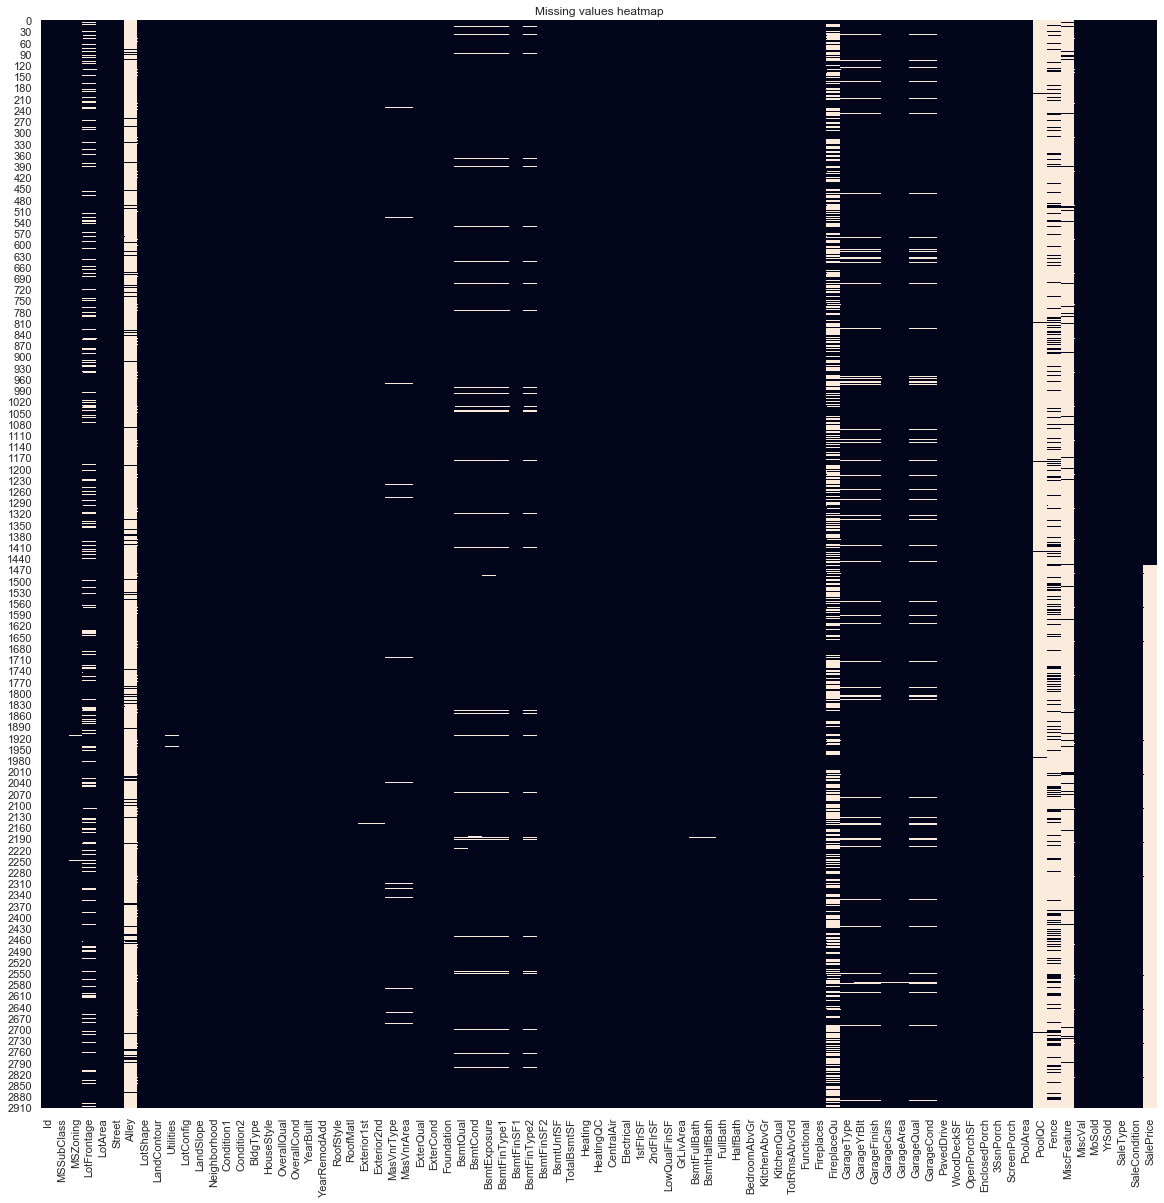

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(total_data.isnull(), cbar = False).set_title("Missing values heatmap")

We see that **Alley**, **PoolQC**, **Fence**, **MiscVal**, **FireplaceQu** almost completely empty, but they can be useful, since they are related to other signs, fill the empty values with the values 'None'.

In [10]:
features_list = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']

for col in features_list:
    total_data[col].fillna('None', inplace=True)
    total_data.shape

Next, we will start working with columns where there are fewer empty values; here it is already worth thinking about how to fill them.

First, let's create a list of columns where there are not many empty values.

In [11]:
ndd_cols = ['Utilities', 'MSZoning', 'MasVnrType', 'GarageType',
            'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtFullBath',
            'FullBath', 'KitchenQual', 'Functional', 'GarageType',
            'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
            'SaleType', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF',
            'Exterior1st', 'Exterior2nd', 'GarageCars', 'GarageArea', 'Electrical']

We will divide the columns according to the type of data in them, we will place the categorical columns in one list, numerical in the others.

Then we fill in the values in them: for the numerical, we fill in the average value for the column (since there are not so many values), and for the categorical, we fill in the most frequent ones.

In [12]:
cat_ndd_cols = [col for col in ndd_cols if total_data.dtypes[col] == 'object']
num_ndd_cols = [col for col in ndd_cols if col not in cat_ndd_cols]

for col in cat_ndd_cols:
    total_data[col].fillna(total_data[col].mode()[0], inplace=True)
    
for col in num_ndd_cols:
    total_data[col].fillna(total_data[col].mean(), inplace=True)

The **LotFrontage** column remains, there are quite a few empty values, but I think it is very useful, you need to leave it and fill it with values. Let's take a look at her.

In [13]:
total_data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

Let's see how many empty values there are.

In [14]:
total_data['LotFrontage'].isnull().sum()

486

Let's do the following: group the data by **LotArea** and **LotShape**, and insert the average values from these groups into **LotFrontage**.

In [15]:
grp = total_data.groupby(['LotArea', 'LotShape'])
grp.LotFrontage.apply(lambda x: x.fillna(x.median()))
total_data.LotFrontage.fillna(total_data.LotFrontage.median, inplace = True)
total_data.LotFrontage.isnull().sum()

0

After applying _apply_, the type of values in the column becomes 'object', change it to 'float64', it was like this initially.

In [16]:
pd.to_numeric(total_data['LotFrontage'], errors='coerce')

0        65
1        80
2        68
3        60
4        84
       ... 
2914     21
2915     21
2916    160
2917     62
2918     74
Name: LotFrontage, Length: 2919, dtype: object

Let's check if there are empty values in the dataset.

Text(0.5, 1, 'Missing values heatmap')

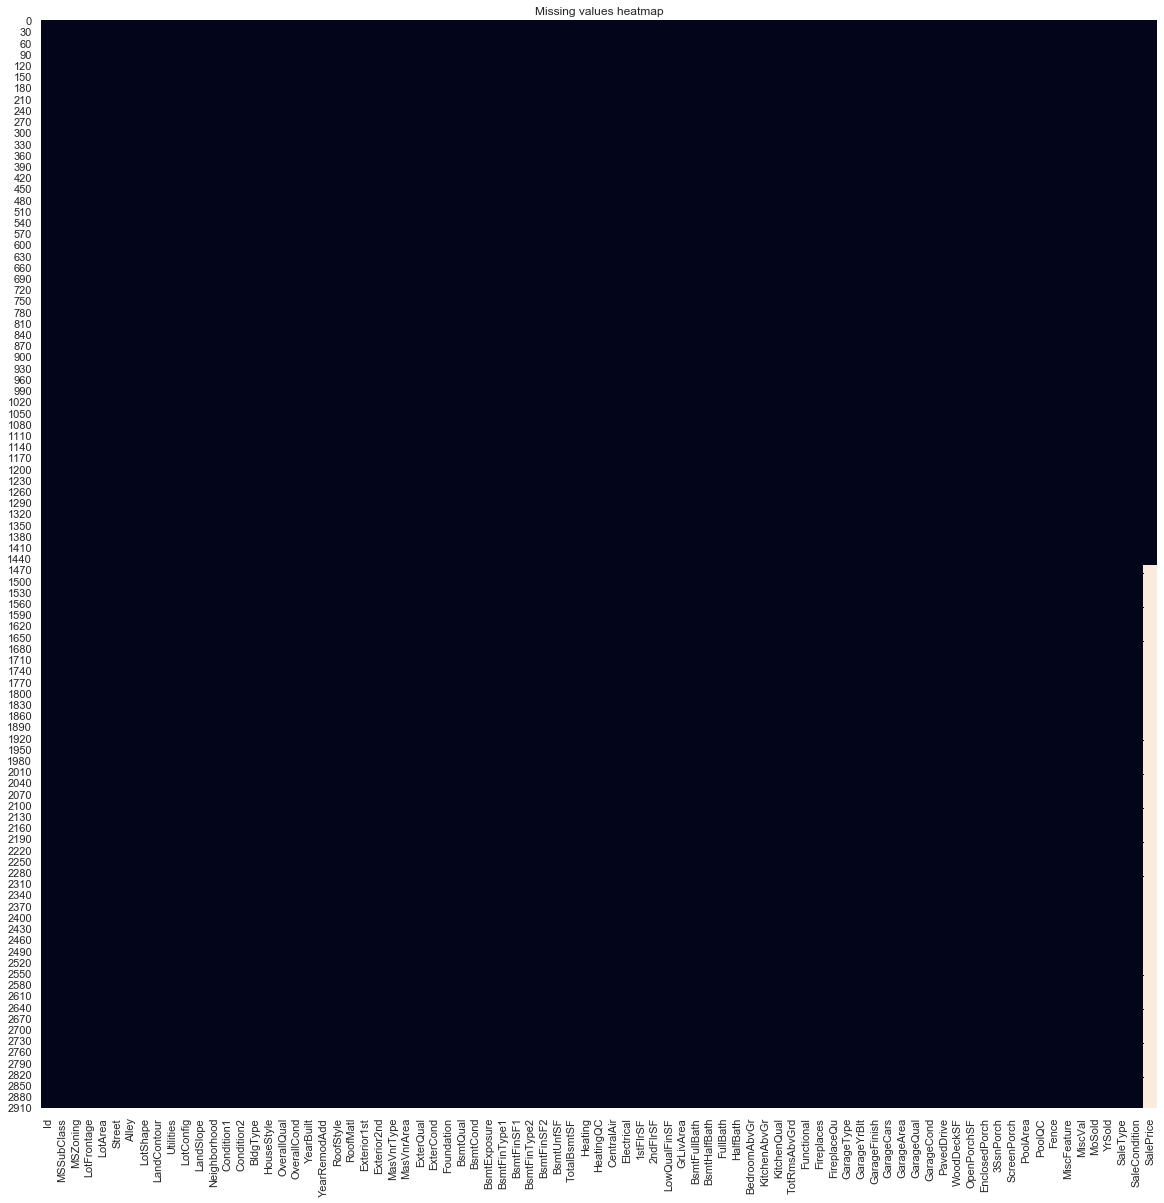

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(total_data.isnull(), cbar = False).set_title("Missing values heatmap")